### Accessing data and metadata from mth5 files 

mth5 is an h5 file structure and is accessed through h5py.

There are a bunch of tools that can make working with these files easy.

In this tutorial we 
- open and close files with MTH5, 
- open with an initialize_mth5 helper function, 
- use pythons built-in contextmanger to make developing code with mth5_objects more robust to issues with h5 file closing
- show how to extract a channel_summary
- show how to access data from a Run (associated with a station)
- 

### IMPORTS

In [13]:
import pathlib
from mth5.mth5 import MTH5
from mth5.utils.helpers import initialize_mth5
from contextlib import contextmanager

### Check that you have the file
If you do not, you can download it from here:
https://github.com/brunorpinho/tsvi/issues/1

In [2]:
#you need to set the path to this dir on your local system
tsvi_notebook_path = "/home/kkappler/software/irismt/tsvi/notebooks"
tsvi_notebook_path = pathlib.Path(tsvi_notebook_path)


In [3]:
mth5_path = tsvi_notebook_path.joinpath("test12rr.h5")
if mth5_path.exists:
    print(mth5_path.absolute())
else:
    print("need to get mth5 file")
    print("it can be found under aurora/test/synthetic/data/")
    print("it is also a gzipped attachment on the github issue #1")
    # https://github.com/brunorpinho/tsvi/issues/1
    

/home/kkappler/software/irismt/tsvi/notebooks/test12rr.h5


In [28]:
#Aside: Checksums, i.e.  
!md5sum "test12rr.h5"
# are not great for h5 files, because they seem to log some info about when they were last opened or closed.

f8c5b649eef551b1787ed4c2909ef82e  test12rr.h5


### Brute force way to open mth5

In [30]:
mth5_obj = MTH5(file_version="0.1.0")
mth5_obj.open_mth5(mth5_path, mode="r")

### This is now open in read mode.  
If you don't close it, you cannot open it again, so let's close it

In [31]:
mth5_obj.close_mth5()

2022-07-29 13:56:20,425 [line 731] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing test12rr.h5


### One-line way to open the mth5
This method defaults to opening the file in _append_ mode

In [32]:
mth5_obj = initialize_mth5(mth5_path)

This object lets us access the data and metadata in the archive

In [33]:
df = mth5_obj.channel_summary.to_dataframe()

In [34]:
df.station.unique()

array(['test1', 'test2'], dtype=object)

In [35]:
df

,survey,station,run,latitude,longitude,elevation,component,start,end,n_samples,sample_rate,measurement_type,azimuth,tilt,units,hdf5_reference,run_hdf5_reference,station_hdf5_reference
0,none,test1,001,0.0,0.0,0.0,ex,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,40000,1.0,electric,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
1,none,test1,001,0.0,0.0,0.0,ey,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,40000,1.0,electric,90.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
2,none,test1,001,0.0,0.0,0.0,hx,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,40000,1.0,magnetic,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
3,none,test1,001,0.0,0.0,0.0,hy,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,40000,1.0,magnetic,90.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
4,none,test1,001,0.0,0.0,0.0,hz,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,40000,1.0,magnetic,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
5,none,test2,001,0.0,0.0,0.0,ex,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,40000,1.0,electric,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
6,none,test2,001,0.0,0.0,0.0,ey,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,40000,1.0,electric,90.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
7,none,test2,001,0.0,0.0,0.0,hx,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,40000,1.0,magnetic,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
8,none,test2,001,0.0,0.0,0.0,hy,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,40000,1.0,magnetic,90.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
9,none,test2,001,0.0,0.0,0.0,hz,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,40000,1.0,magnetic,0.0,0.0,none,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>


In [36]:
station_1 = mth5_obj.get_station("test1")

In [37]:
station_1

/Survey/Stations/test1:
    |- Group: 001
    -------------
        --> Dataset: ex
        .................
        --> Dataset: ey
        .................
        --> Dataset: hx
        .................
        --> Dataset: hy
        .................
        --> Dataset: hz
        .................
    |- Group: Transfer_Functions
    ----------------------------

In [38]:
run_001 = station_1.get_run("001")
run_001

/Survey/Stations/test1/001:
    --> Dataset: ex
    .................
    --> Dataset: ey
    .................
    --> Dataset: hx
    .................
    --> Dataset: hy
    .................
    --> Dataset: hz
    .................

In [39]:
run_ts = run_001.to_runts()

/home/kkappler/anaconda2/envs/tsvi/lib/python3.9/site-packages/mth5/timeseries/channel_ts.py:80: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  dt_index = pd.date_range(


In [40]:
run_ts

RunTS Summary:
	Station:     test1
	Run:         001
	Start:       1980-01-01T00:00:00+00:00
	End:         1980-01-01T11:06:39+00:00
	Sample Rate: 1.0
	Components:  ['ex', 'ey', 'hx', 'hy', 'hz']

In [41]:
xr_ds = run_ts.dataset
xr_ds

<xarray.Dataset>
Dimensions:  (time: 40000)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1980-01-01T11:06:39
Data variables:
    ex       (time) int64 -345 1007 -14 2257 167 ... -2201 -1622 -1338 -856 1368
    ey       (time) int64 -1084 909 1377 -644 820 ... 1266 1298 4113 1125 531
    hx       (time) int64 -479 -492 -331 -488 -420 ... -347 -404 -131 -159 -309
    hy       (time) int64 -1047 -1189 -1135 -1366 -1280 ... -839 -916 -800 -1106
    hz       (time) int64 89 82 125 85 134 117 180 ... 220 219 152 220 160 110
Attributes: (12/19)
    channels_recorded_auxiliary:            []
    channels_recorded_electric:             ['ex', 'ex', 'ex', 'ex', 'ex', 'e...
    channels_recorded_magnetic:             ['hx', 'hx', 'hx', 'hx', 'hx', 'h...
    data_logger.firmware.author:            none
    data_logger.firmware.name:              None
    data_logger.firmware.version:           None
    ...                                     ...
    hdf5_reference:                         <HDF5 object reference>
    id:                                     001
    mth5_type:                              Run
    sample_rate:                            1.0
    time_period.end:                        1980-01-01T11:06:39+00:00
    time_period.start:                      1980-01-01T00:00:00+00:00

In [42]:
import matplotlib.pyplot as plt

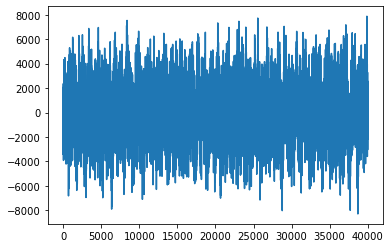

In [43]:
plt.plot(xr_ds.ex)

In [44]:
mth5_obj.close_mth5()

2022-07-29 13:57:00,594 [line 731] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing test12rr.h5


## Another way: Context Manager
USing context manager you can have the file open only when you are doing stuff with it 
and have it close automatically

In [45]:
mth5_obj.close_mth5()

2022-07-20 15:17:12,952 [line 731] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing /home/kkappler/software/irismt/tsvi/notebooks/test12rr.h5


In [ ]:
@contextmanager
def managed_resource(mth5_path, **kwds):
    mth5_obj = initialize_mth5(mth5_path)
    # Code to acquire resource, e.g.:
#    resource = acquire_resource(*args, **kwds)    
    
    try:
        yield mth5_obj
    finally:
        # Code to release resource, e.g.:
        #release_resource(resource)
        mth5_obj.close_mth5()

# >>> with managed_resource(timeout=3600) as resource:
# ...     # Resource is released at the end of this block,
# ...     # even if code in the block raises an exception

In [47]:
with managed_resource(mth5_path) as m:
    print("hi")
    #print(m)
    df = m.channel_summary.to_dataframe()
    print(df)
print(m)

2022-07-29 13:57:14,070 [line 731] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing test12rr.h5


hi
  survey station  run  latitude  longitude  elevation component  \
0   none   test1  001       0.0        0.0        0.0        ex   
1   none   test1  001       0.0        0.0        0.0        ey   
2   none   test1  001       0.0        0.0        0.0        hx   
3   none   test1  001       0.0        0.0        0.0        hy   
4   none   test1  001       0.0        0.0        0.0        hz   
5   none   test2  001       0.0        0.0        0.0        ex   
6   none   test2  001       0.0        0.0        0.0        ey   
7   none   test2  001       0.0        0.0        0.0        hx   
8   none   test2  001       0.0        0.0        0.0        hy   
9   none   test2  001       0.0        0.0        0.0        hz   

                      start                       end  n_samples  sample_rate  \
0 1980-01-01 00:00:00+00:00 1980-01-01 11:06:39+00:00      40000          1.0   
1 1980-01-01 00:00:00+00:00 1980-01-01 11:06:39+00:00      40000          1.0   
2 1980-01-01 00: